# Installing all required libraries ( Most of them are not required 😆)

In [ ]:
# Silent installation of required libraries
!pip install mediapipe opencv-python tensorflow keras scikit-learn >> log.txt 2>&1
#check logs in log.txt in filebrowser if you are interested.

In [ ]:
# Importing data from my GDrive, your mounting steps are same but the path where you store may vary.
from google.colab import drive
drive.mount('/content/drive') # /content/drive is standard practice, you can change.

Mounted at /content/drive


## Where am I?

In [ ]:
!pwd && ls
# present working dir and listing files in the present dir

/content
drive  log.txt	sample_data


## What the hell is in my folder?

In [ ]:
import os
for i in os.listdir('/content/drive'): # check if you have this thing called "iris-dataset"
    print(i)

MyDrive
.shortcut-targets-by-id
Shareddrives
.file-revisions-by-id
.Trash-0


## Now target is "MyDrive"

In [ ]:
from os import walk

f = []
layer = 1
w = walk("/content/drive/MyDrive")
for (dirpath, dirnames, filenames) in w:
    if layer == 2:
        f.extend(dirnames)
        break
    layer += 1

## That was a stupid method to list all files and dirs to get an image file, lets try using find...

In [ ]:
import subprocess
command = ["find","/content/drive/MyDrive/iris_dataset/iris_dataset/train/eye","-type","f","-name","*.JPG"]
result = subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
if result.returncode == 0:
    print(result.stdout)
else:
    print(result.stderr)

/content/drive/MyDrive/iris_dataset/iris_dataset/train/eye/1-543.JPG
/content/drive/MyDrive/iris_dataset/iris_dataset/train/eye/1-585.JPG
/content/drive/MyDrive/iris_dataset/iris_dataset/train/eye/1-610.JPG
/content/drive/MyDrive/iris_dataset/iris_dataset/train/eye/1-592.JPG
/content/drive/MyDrive/iris_dataset/iris_dataset/train/eye/1-580.JPG
/content/drive/MyDrive/iris_dataset/iris_dataset/train/eye/1-556.JPG
/content/drive/MyDrive/iris_dataset/iris_dataset/train/eye/1-IMG_2016_05_09_9999_17.JPG
/content/drive/MyDrive/iris_dataset/iris_dataset/train/eye/1-IMG_2016_05_09_9999_6.JPG
/content/drive/MyDrive/iris_dataset/iris_dataset/train/eye/1-600.JPG
/content/drive/MyDrive/iris_dataset/iris_dataset/train/eye/1-616.JPG
/content/drive/MyDrive/iris_dataset/iris_dataset/train/eye/1-IMG_2016_05_09_9999_22.JPG
/content/drive/MyDrive/iris_dataset/iris_dataset/train/eye/1-595.JPG
/content/drive/MyDrive/iris_dataset/iris_dataset/train/eye/1-606.JPG
/content/drive/MyDrive/iris_dataset/iris_datase

In [ ]:
import cv2
image = cv2.imread('/content/drive/MyDrive/iris_dataset/iris_dataset/train/eye/1-543.JPG')
cv2.imshow("Image", image)
# this crashes,, alert don't run

DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow


## Switching to matplotlib for outputs as cv2.imshow crashes jupyter notebooks.

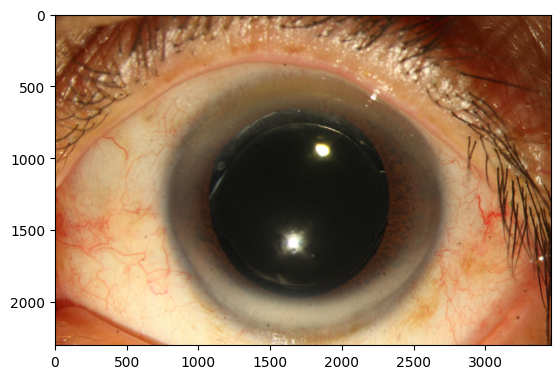

In [ ]:
from matplotlib import pyplot as plt
import numpy as np # this is preinstalled on colab instances..
image = cv2.imread('/content/drive/MyDrive/iris_dataset/iris_dataset/train/eye/1-543.JPG')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

## If you hate cv2 for some reason use PIL (python imaging lib)

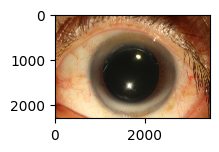

CPU times: user 775 ms, sys: 188 ms, total: 963 ms
Wall time: 843 ms


In [ ]:
%%time
# adds cell magic for time to execute cell
from PIL import Image # this is also pre-installed
img = np.asarray(Image.open('/content/drive/MyDrive/iris_dataset/iris_dataset/train/eye/1-543.JPG'))

#print(repr(img)) # don't care unless u're curious about image repr, this is same for any other pyobject
plt.figure(figsize=(2,2)) #smaller image, you can make the figure size larger before displaying the image
imgplot = plt.imshow(img)
plt.show(imgplot)

## Now b/w image

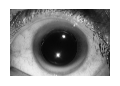

CPU times: user 296 ms, sys: 173 ms, total: 469 ms
Wall time: 284 ms


In [ ]:
%%time
img = cv2.imread('/content/drive/MyDrive/iris_dataset/iris_dataset/train/eye/1-543.JPG', cv2.IMREAD_GRAYSCALE)
# Convert BGR to grayscale
# b_w_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Display the grayscale image
# height, width = img.shape
# img = img[width//2, width//2]
plt.figure(figsize=(1, 1))
plt.axis('off')
plt.imshow(img, cmap='gray')
# plt.subplots_adjust(left=0,right=2,top=2,bottom=0)
# plt.gca().set_aspect('auto')
plt.tight_layout(pad=0)
plt.show()

## various colormaps

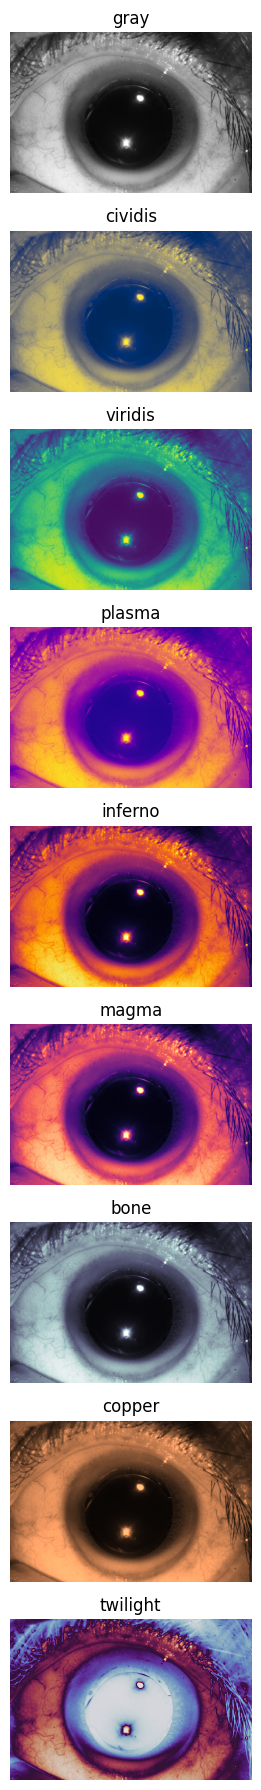

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# List of colormaps to display
colormaps = ['gray', 'cividis', 'viridis', 'plasma', 'inferno', 'magma', 'bone', 'copper', 'twilight']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(colormaps), ncols=1, figsize=(6, len(colormaps) * 2))

# Generate a dummy image
data = img

# Plot each colormap
for ax, cmap in zip(axes, colormaps):
    ax.imshow(data, cmap=cmap)
    ax.set_title(cmap)
    ax.axis('off')

plt.tight_layout()
plt.show()

## Performing kmeans on twilight colormap

In [ ]:
print("doesn't work")

doesn't work


## Falling back to mediapipe

In [ ]:
print("doesn't work with no face!")

doesn't work with no face!


## Now Haar cascades

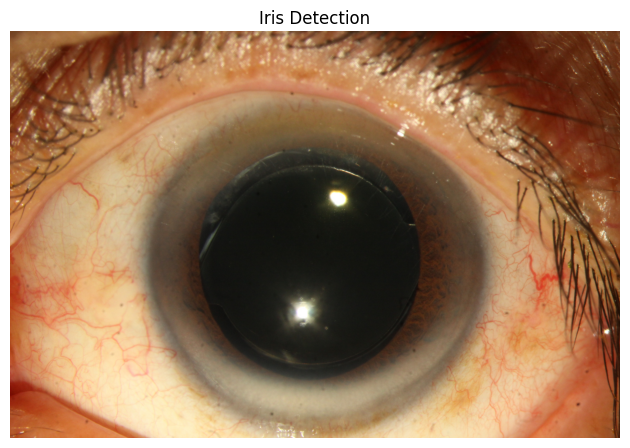

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('/content/drive/MyDrive/iris_dataset/iris_dataset/train/eye/1-543.JPG')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Use Haar cascades to detect the eyes (you need the haarcascades for eye detection)
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Detect eyes in the image
eyes = eye_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

for (x, y, w, h) in eyes:
    # Extract the region of interest (eye region)
    eye_region = gray[y:y+h, x:x+w]

    # Apply thresholding to get a binary image
    _, binary_eye = cv2.threshold(eye_region, 30, 255, cv2.THRESH_BINARY_INV)

    # Find contours in the binary image
    contours, _ = cv2.findContours(binary_eye, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on the eye region
    for contour in contours:
        if len(contour) >= 5:
            ellipse = cv2.fitEllipse(contour)
            cv2.ellipse(img, ellipse, (0, 255, 0), 2)

# Display the result
# plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Iris Detection')
plt.axis('off')
plt.tight_layout()
plt.show()


### 🐲 wasted

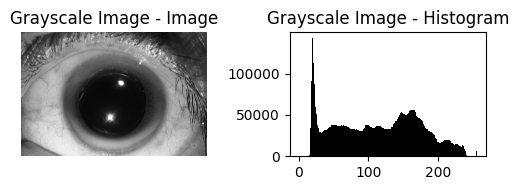

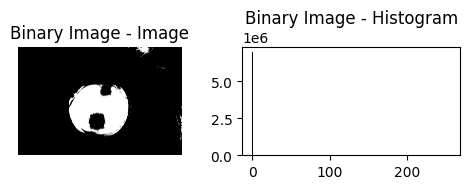

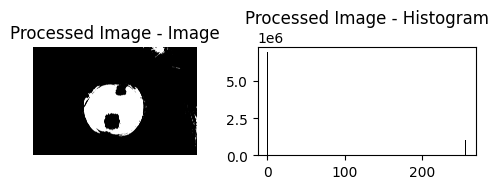

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
# uploaded = files.upload()
# img = cv2.imread(next(iter(uploaded.keys())))

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding to highlight the pupil and iris
_, binary_eye = cv2.threshold(gray, 30, 255, cv2.THRESH_BINARY_INV)

# Use morphological operations to clean up the image
kernel = np.ones((5, 5), np.uint8)
processed_eye = cv2.morphologyEx(binary_eye, cv2.MORPH_CLOSE, kernel)

# Function to plot image and histogram
def plot_image_and_histogram(image, title):
    plt.figure(figsize=(5,2))

    # Plot image
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'{title} - Image')
    plt.axis('off')

    # Plot histogram
    plt.subplot(1, 2, 2)
    plt.hist(image.ravel(), bins=256, range=[0, 256], color='black')
    plt.title(f'{title} - Histogram')

    plt.tight_layout()
    plt.show()

# Plot Grayscale Image and Histogram
plot_image_and_histogram(gray, 'Grayscale Image')

# Plot Binary Image and Histogram
plot_image_and_histogram(binary_eye, 'Binary Image')

# Plot Processed Image and Histogram
plot_image_and_histogram(processed_eye, 'Processed Image')

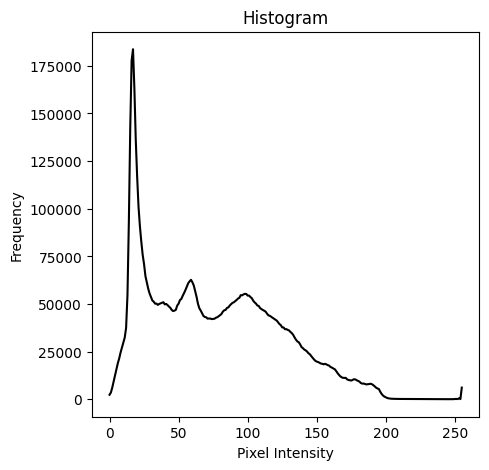

The peak intensity is: 17


In [ ]:
# Compute the histogram
hist = cv2.calcHist([img], [0], None, [256], [0, 256])

# Find the intensity with the maximum count
max_intensity = np.argmax(hist)

# Plot the histogram
plt.figure(figsize=(5,5))
plt.plot(hist, color='black')
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

# Print the peak intensity
print(f'The peak intensity is: {max_intensity}')


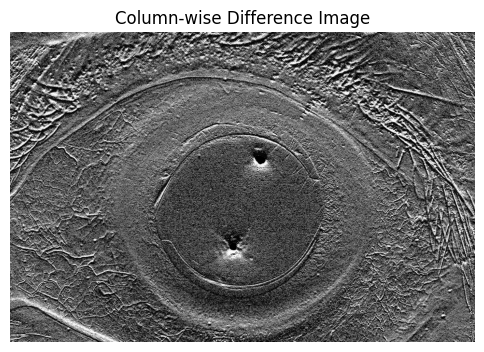

In [ ]:
# Calculate the difference between each pixel and the previous pixel in the same column
# Pad the first row with 0 to prevent out of bounds access
diff_img_col = np.diff(img, axis=0)

# Normalize the difference image for better visualization
# diff_img_col = cv2.normalize(diff_img_col, None, 0, 255, cv2.NORM_MINMAX)

# Display the difference image
plt.figure(figsize=(6, 6))
plt.imshow(diff_img_col, cmap='gray')
plt.axis('off')
plt.title('Column-wise Difference Image')
plt.show()


TypeError: Invalid shape (2303, 3456, 3, 4) for image data

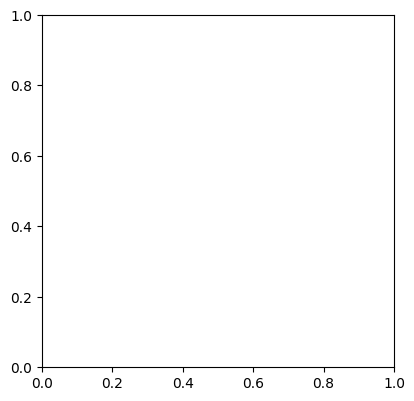

In [ ]:
# Calculate the difference between each pixel and the previous pixel in the same column (axis=0)
diff_img_col = np.diff(img, axis=0)

# Normalize the difference image for better visualization
diff_img_col = cv2.normalize(diff_img_col, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Apply Gaussian blur to the difference image to smooth it
blurred_diff_img = cv2.GaussianBlur(diff_img_col, (5, 5), 0)

# Apply thresholding for segmentation
_, segmented_img = cv2.threshold(blurred_diff_img, 50, 255, cv2.THRESH_BINARY)

# Apply the twilight colormap (you used 'inferno', so I'll apply that here)
inferno_colormap = plt.get_cmap('inferno')

# Use the inferno colormap by mapping the difference image through it
diff_img_col_mapped = inferno_colormap(blurred_diff_img / 255.0)  # Scale the values to [0,1]

# Display the results
plt.figure(figsize=(10, 5))

# Show the blurred difference image with the colormap applied
plt.subplot(1, 2, 1)
plt.imshow(diff_img_col_mapped)
plt.axis('off')
plt.title('Column-wise Difference with Gaussian Blur and Inferno Colormap')

# Show the segmented image
plt.subplot(1, 2, 2)
plt.imshow(segmented_img, cmap='gray')
plt.axis('off')
plt.title('Segmented Image after Gaussian Blur')

plt.tight_layout()
plt.show()


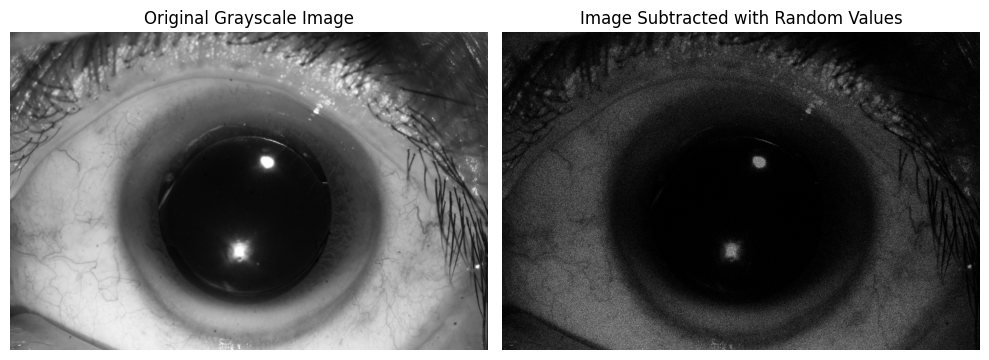

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
# img = cv2.imread('eye.jpg', cv2.IMREAD_GRAYSCALE)

# Generate a random matrix of the same shape with values between 0 and 255
random_vals = np.random.randint(0, 256, size=img.shape, dtype=np.uint8)

# Subtract the random values from the image
img_random_subtracted = img.astype(np.int16) - random_vals.astype(np.int16)

# Clip the values to make sure the result stays within the 0-255 range
img_random_subtracted = np.clip(img_random_subtracted, 0, 255).astype(np.uint8)

# Display the original and result images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original Grayscale Image')

# Result image (Subtracted with random values)
plt.subplot(1, 2, 2)
plt.imshow(img_random_subtracted, cmap='gray')
plt.axis('off')
plt.title('Image Subtracted with Random Values')

plt.tight_layout()
plt.show()


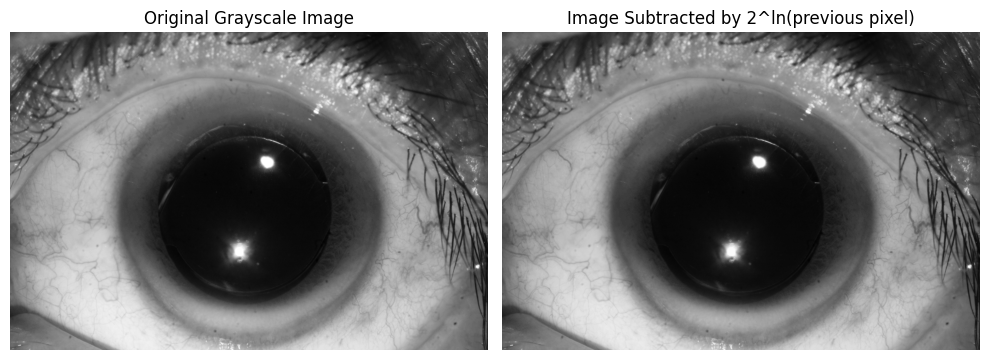

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
# img = cv2.imread('eye.jpg', cv2.IMREAD_GRAYSCALE)

# Create a copy of the image to store the results
img_copy = img.copy().astype(np.float32)

# Iterate through the columns and apply the operation: current pixel - 2^ln(previous pixel)
for row in range(1, img.shape[0]):  # Start from the second row to avoid out of bounds
    for col in range(img.shape[1]):
        prev_pixel = img[row - 1, col]
        if prev_pixel > 0:  # To avoid log(0) issues
            img_copy[row, col] = img[row, col] - 2**np.log(prev_pixel)
        else:
            img_copy[row, col] = img[row, col]  # No change for zero or negative pixels

# Clip the result to make sure the pixel values are in the 0-255 range
img_copy = np.clip(img_copy, 0, 255).astype(np.uint8)

# Display the original and result images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original Grayscale Image')

# Result image (Subtracted by 2^ln(previous pixel))
plt.subplot(1, 2, 2)
plt.imshow(img_copy, cmap='gray')
plt.axis('off')
plt.title('Image Subtracted by 2^ln(previous pixel)')

plt.tight_layout()
plt.show()


There are several image detection algorithms with relatively simple underlying mathematical concepts. Here are a few of them:
1. Edge Detection (Sobel, Prewitt, and Canny)

    Math Basis: These algorithms detect edges by finding regions of rapid intensity changes (gradients) in an image.
    Key Concepts: Convolution with simple kernels (Sobel, Prewitt), gradient computation.
    How it works: It computes the gradient of pixel intensity in horizontal and vertical directions. If the gradient is large, an edge is present.
    Example:
        Sobel Kernel: Edge strength=(Gx2+Gy2)Edge strength=(Gx2​+Gy2​)

        ​

2. Thresholding

    Math Basis: Pixel intensities are compared to a threshold value.
    Key Concepts: Binary classification of pixels based on intensity.
    How it works: Any pixel value below the threshold is set to 0 (black), and values above are set to 255 (white). It's used for simple object detection.
    Example:
        Thresholding rule: I(x,y)={255if I(x,y)>T0otherwiseI(x,y)={2550​if I(x,y)>Totherwise​
        Where TT is the threshold value.

3. Contours

    Math Basis: Boundary detection using edge-following algorithms.
    Key Concepts: Shape detection by tracing along object boundaries.
    How it works: After detecting edges (using Canny or another method), contours are found by following connected boundaries of similar intensity.
    Example:
        Mathematical foundation: Chain code or pixel connectivity.
        Used in OpenCV’s cv2.findContours() function.

4. Hough Transform (for lines and circles)

    Math Basis: Voting-based algorithm to detect geometric shapes.
    Key Concepts: Polar coordinates, parametric equations.
    How it works: It converts points in an image space into parameter space and detects lines or circles by finding intersections in parameter space.
    Example:
        Line equation: y=mx+by=mx+b or in polar coordinates: ρ=xcos⁡(θ)+ysin⁡(θ)ρ=xcos(θ)+ysin(θ)
        Circle equation: (x−a)2+(y−b)2=r2(x−a)2+(y−b)2=r2

5. Template Matching

    Math Basis: Cross-correlation of image patches.
    Key Concepts: Comparing a small template image to a larger image to find a match.
    How it works: The algorithm slides the template over the image and calculates the similarity between the template and a region of the image.
    Example:
        Similarity score: Sum of squared differences (SSD) or normalized cross-correlation (NCC).

6. Simple Blob Detection

    Math Basis: Identifying regions that differ in properties (like intensity or size) from the surrounding area.
    Key Concepts: Detects circular objects by looking for uniform intensity regions.
    How it works: Blob detection finds areas that are significantly brighter or darker than their surroundings.
    Example:
        σσ-based Gaussian smoothing is used to detect blobs at different scales.

7. Corner Detection (Harris Corner Detection)

    Math Basis: Measures change in intensity in all directions.
    Key Concepts: Local gradient variations around a pixel.
    How it works: It calculates the change in pixel intensity when the window is shifted in different directions, detecting areas where intensity changes sharply in multiple directions (corners).
    Example:
        Corner response: R=det⁡(M)−k(trace(M))2R=det(M)−k(trace(M))2

8. Image Segmentation (Watershed Algorithm)

    Math Basis: Treats the image as a topographic surface.
    Key Concepts: Minima and maxima of image gradients.
    How it works: Regions are "flooded" from seed points, and boundaries between regions form when water from different regions meets.
    Example:
        Gradient magnitude used to determine the steepness of edges between objects.

Summary of Simple Math Behind These:

    Gradients: Measure intensity change between neighboring pixels (Sobel, Prewitt, and Canny).
    Convolution: Applying a filter/kernel to detect features.
    Geometric Shapes: Lines, circles using parametric equations (Hough Transform).
    Pixel Intensity Comparison: Thresholding or template matching.

These algorithms are commonly implemented in libraries like OpenCV, and their underlying math is fairly simple and understandable. They can be effective for basic image detection tasks without complex machine learning.

#### What is a filter?
#### What is blurring?
#### How is gabor filter better than Gaussian or 3xbox?
#### Math is simple don't look at formulae first, understand the most simple thing first.


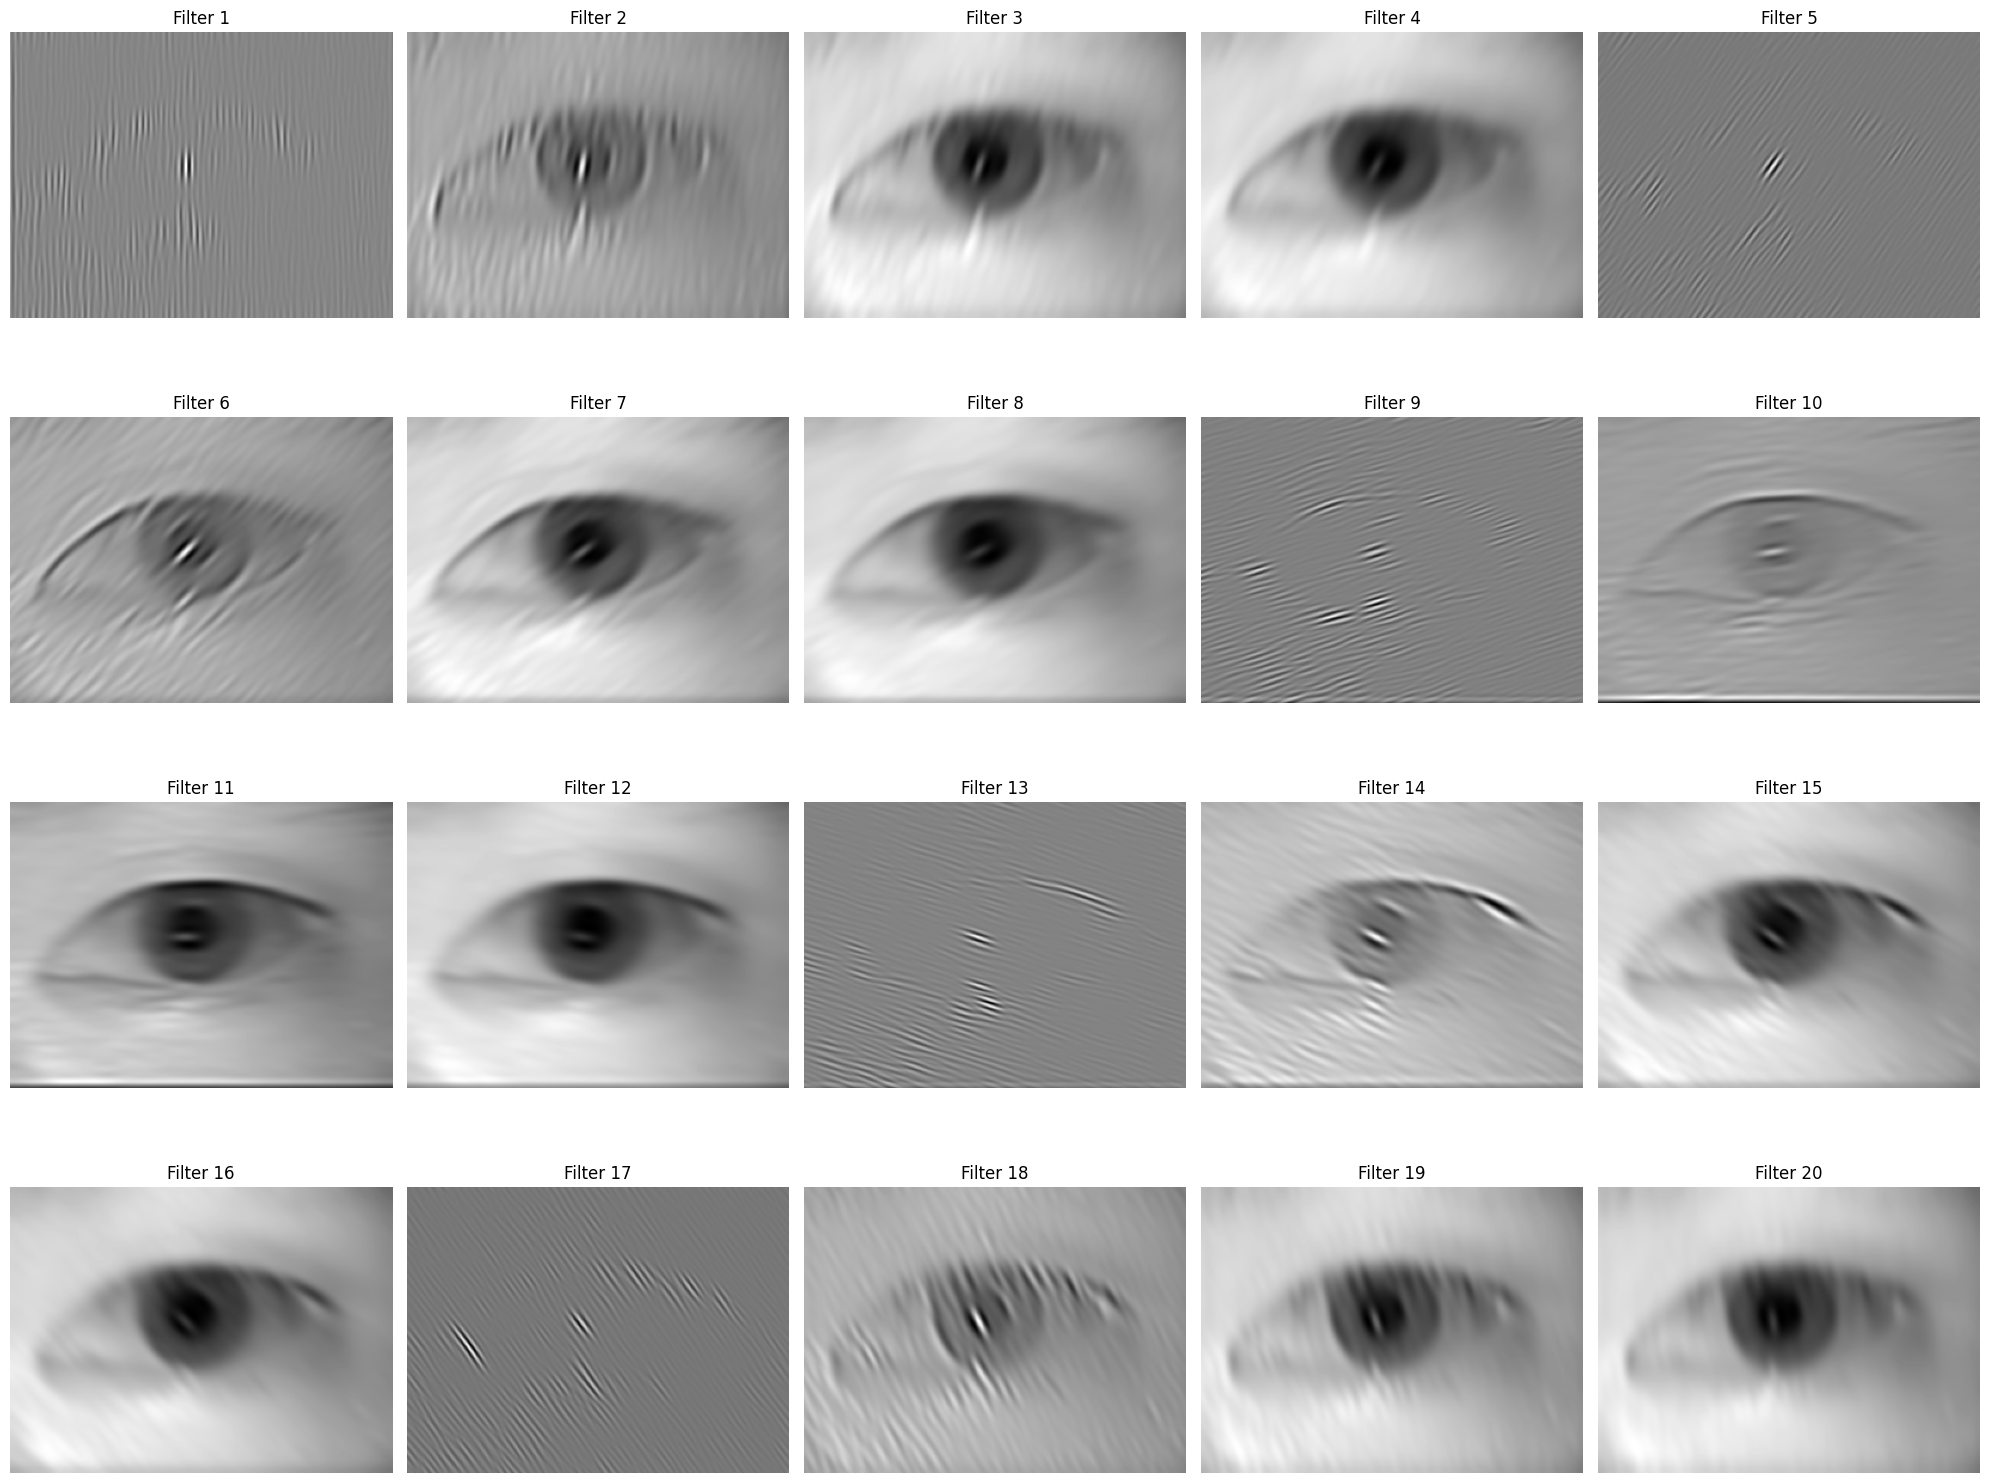

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

def gabor_filter(kernel_size, sigma, theta, lambda_, gamma, psi):
    """
    Generate a Gabor filter kernel.

    :param kernel_size: Size of the kernel (width, height).
    :param sigma: Standard deviation of the Gaussian envelope.
    :param theta: Orientation of the Gabor filter.
    :param lambda_: Wavelength of the sinusoidal factor.
    :param gamma: Spatial aspect ratio.
    :param psi: Phase offset.
    :return: Gabor filter kernel.
    """
    sigma_x = sigma
    sigma_y = sigma / gamma

    nstds = 3  # Number of standard deviations to cover
    x_max = max(abs(nstds * sigma_x), abs(nstds * sigma_y))
    y_max = max(abs(nstds * sigma_x), abs(nstds * sigma_y))
    x_min = -x_max
    y_min = -y_max

    x, y = np.meshgrid(np.arange(x_min, x_max + 1), np.arange(y_min, y_max + 1))

    x_theta = x * np.cos(theta) + y * np.sin(theta)
    y_theta = -x * np.sin(theta) + y * np.cos(theta)

    gb = np.exp(-0.5 * (x_theta**2 / sigma_x**2 + y_theta**2 / sigma_y**2)) * \
         np.cos(2 * np.pi / lambda_ * x_theta + psi)

    return gb

# Load the grayscale image
# img = cv2.imread('eye.jpg', cv2.IMREAD_GRAYSCALE)

# Define parameters for 20 Gabor filters
num_filters = 20
filter_size = 31
sigma = 4.0
lambda_ = 10.0
gamma = 0.5
psi = 0

# Create a figure with subplots
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20, 16))
axes = axes.flatten()

for i in range(num_filters):
    # Varying the theta and lambda for each filter
    theta = (i / num_filters) * np.pi  # Varying orientation
    lambda_ = 5 + (i % 4) * 5  # Varying wavelength

    # Generate the Gabor filter
    gabor_kernel = gabor_filter((filter_size, filter_size), sigma, theta, lambda_, gamma, psi)

    # Apply the Gabor filter to the image
    filtered_img = convolve(img.astype(np.float32), gabor_kernel)

    # Normalize the filtered image for better visualization
    filtered_img = cv2.normalize(filtered_img, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # Display the filtered image
    axes[i].imshow(filtered_img, cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f'Filter {i + 1}')

plt.tight_layout()
plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# image = cv2.imread('/content/drive/MyDrive/SD_card_synced/Test Images/images/fatmar1.jpg', cv2.IMREAD_GRAYSCALE)
image = img
image_copy=image.copy()
for row in range(image.shape[0]):
    for col in range(1, image.shape[1]):
        image_copy[row, col] = abs(int(image[row, col]) - int(image[row, col - 1]))
image2=image_copy.copy()
for row in range(image_copy.shape[0]):
    for col in range(1, image_copy.shape[1]):
        image2[row, col] = abs(image_copy[row, col] - image_copy[row, col - 1])

height,width=image2.shape
# Define the size of the sliding window and the threshold
window_size = 2
threshold = 20  # Set your threshold here

# Create a copy of the image to modify
modified_image = image.copy()

# Slide the window across the image
for row in range(height - window_size + 14):
    for col in range(width - window_size + 100):
        # Extract the 3x3 window
        window = image2[row:row + window_size, col:col + window_size]

        # Calculate the average intensity
        avg_intensity = np.mean(window)

        # Set the pixels in the window to 0 if the average is below the threshold
        if avg_intensity > threshold:
            image2[row:row + window_size, col:col + window_size] = 0

plt.imshow(image2)

<ipython-input-5-1b480a156fb4>:13: RuntimeWarning: overflow encountered in scalar subtract
  image2[row, col] = abs(image_copy[row, col] - image_copy[row, col - 1])
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


KeyboardInterrupt: 

## Plotting  image on x,y and finding eigenvalues and eigenvectors

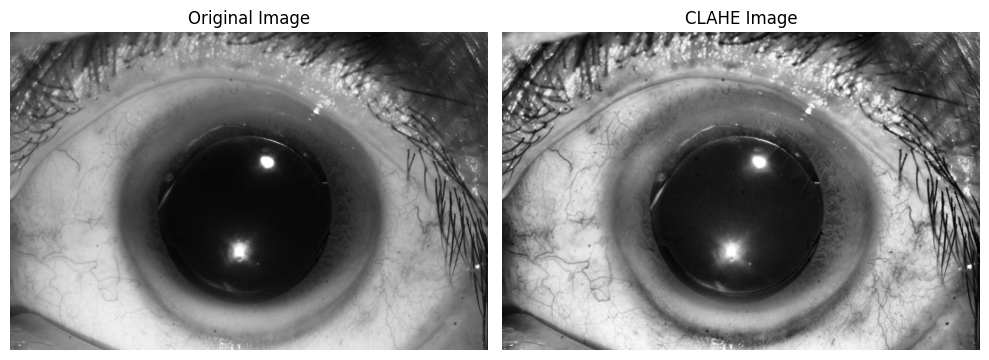

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Read the image in grayscale
img_path = '/content/drive/MyDrive/iris_dataset/iris_dataset/train/eye/1-543.JPG'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Check if image is loaded properly
if img is None:
    print(f"Error: Unable to load image at {img_path}")
else:
    # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    clahe_img = clahe.apply(img)

    # Plot original and CLAHE-applied image side by side
    plt.figure(figsize=(10, 5))

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # CLAHE-applied image
    plt.subplot(1, 2, 2)
    plt.imshow(clahe_img, cmap='gray')
    plt.title('CLAHE Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


In [ ]:
import cv2
import numpy as np
import plotly.graph_objs as go
import plotly.io as pio

# To ensure interactive plots are shown in the Colab notebook
pio.renderers.default = 'colab'

# Step 1: Load the grayscale image
img_path = '/content/drive/MyDrive/iris_dataset/iris_dataset/train/eye/1-543.JPG'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Step 2: Check if the image is loaded correctly
if img is None:
    print(f"Error: Unable to load image at {img_path}")
else:
    # Step 3: Calculate the gradients using Sobel operator
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)  # Gradient in X
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)  # Gradient in Y

    # Step 4: Compute the gradient magnitude
    gradient_magnitude = np.sqrt(sobelx**2 + sobely**2)

    # Step 5: Create meshgrid for X and Y coordinates
    x = np.arange(img.shape[1])  # Width (columns)
    y = np.arange(img.shape[0])  # Height (rows)
    X, Y = np.meshgrid(x, y)

    # Step 6: Create the Plotly 3D surface plot
    fig = go.Figure(data=[go.Surface(z=gradient_magnitude, x=X, y=Y, colorscale='Viridis')])

    # Customize layout
    fig.update_layout(
        title='3D Plot of Image Intensities with Gradient Magnitude',
        scene=dict(
            xaxis_title='X (Pixel Position)',
            yaxis_title='Y (Pixel Position)',
            zaxis_title='Gradient Magnitude'
        )
    )

    # Show the figure (interactive)
    fig.show()


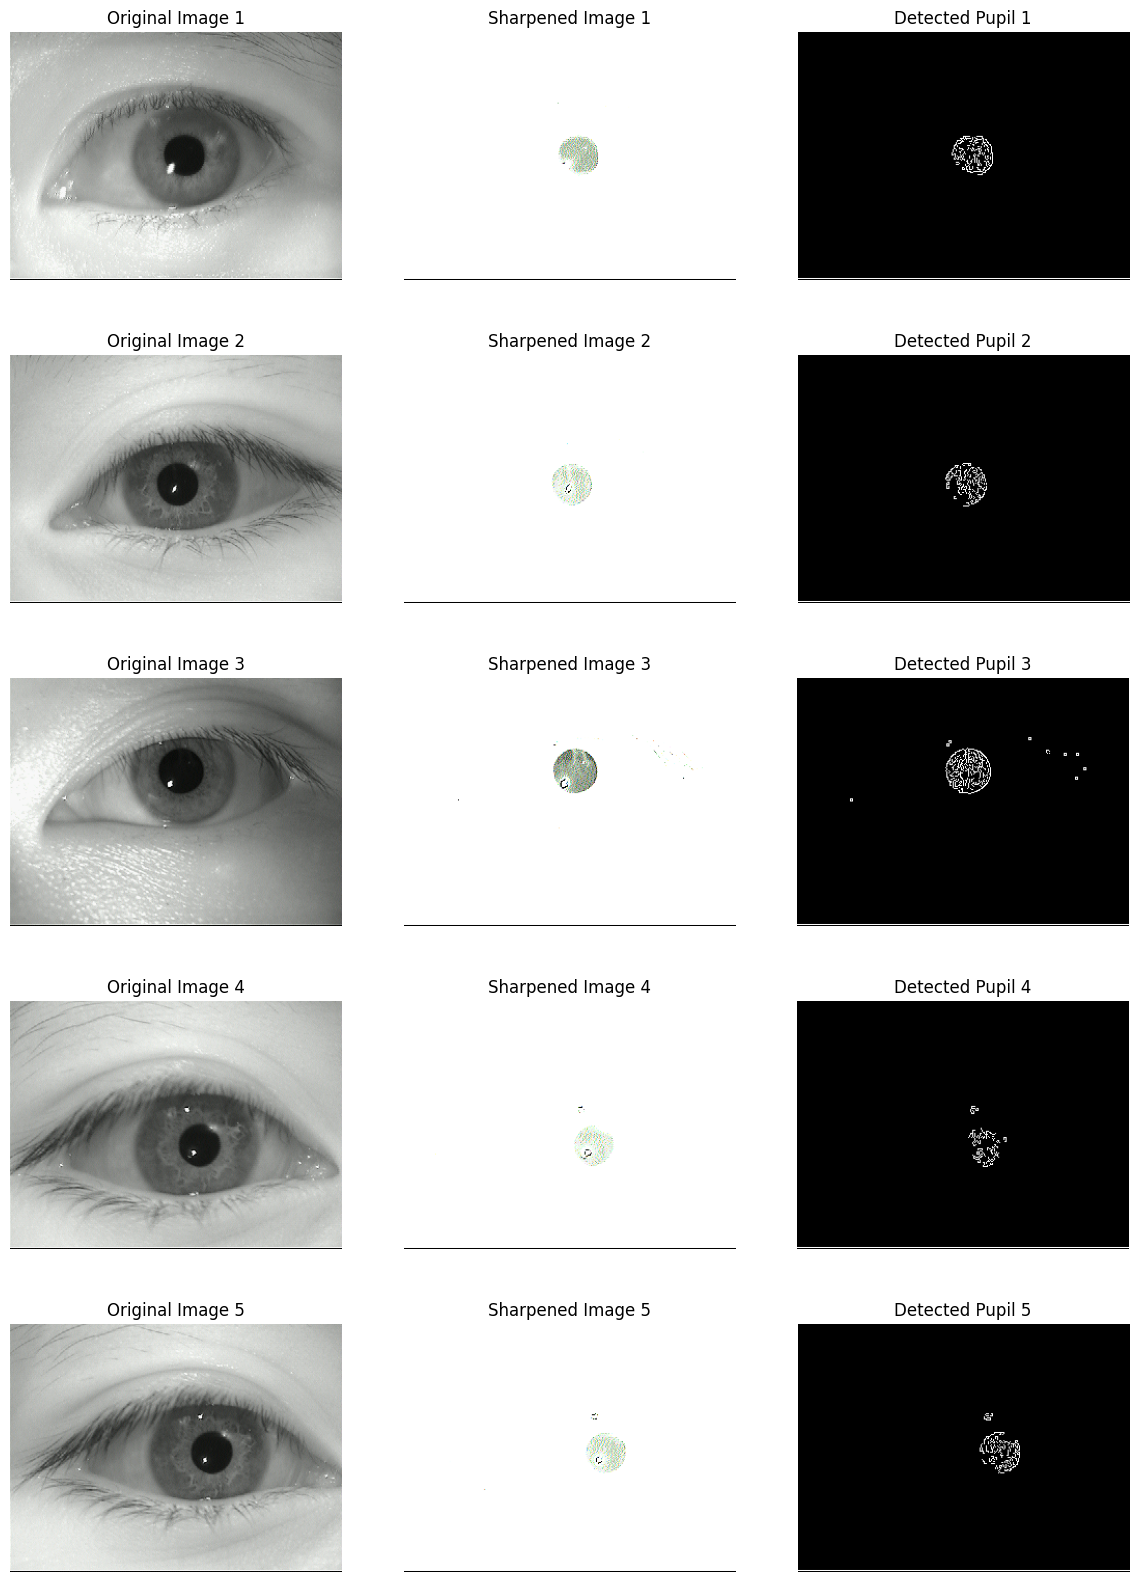

In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

# Path to the folder containing images
image_folder = "/content/drive/MyDrive/SD_card_synced/Test Images/images/"
image_paths = glob(os.path.join(image_folder, "*.jpg"))[:5]  # Load only the first 5 images

# Sharpening kernel
kernel_sharpening = np.array([[-1, -1, -1],
                              [ 0, 15, -1],
                              [ 1, -1, -1]])

# Create a grid of 5x3 subplots (original, sharpened, and Hough Circle versions)
fig, axs = plt.subplots(5, 3, figsize=(15, 20))
fig.subplots_adjust(hspace=0.3, wspace=0.05)  # Adjust spacing between subplots

# Loop through the 5 images
for idx, img_path in enumerate(image_paths):
    # Read the original image
    img = cv2.imread(img_path)

    if img is None:
        continue  # Skip if the image can't be loaded

    # Convert from BGR to RGB for displaying with matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Apply the sharpening kernel
    sharpened = cv2.filter2D(img_rgb, -1, kernel_sharpening)

    # Convert sharpened image to grayscale
    gray_sharpened = cv2.cvtColor(sharpened, cv2.COLOR_RGB2GRAY)

    # Apply Canny edge detection
    edges = cv2.Canny(gray_sharpened, 100, 200)

    # Apply Hough Circle Transform to detect the pupil
    circles = cv2.HoughCircles(gray_sharpened,
                               cv2.HOUGH_GRADIENT, dp=1.2, minDist=30,
                               param1=100, param2=30,
                               minRadius=20, maxRadius=60)

    # If circles are detected, draw them on the original image
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for circle in circles[0, :]:
            center = (circle[0], circle[1])  # x, y coordinates of the center
            radius = circle[2]               # radius of the circle
            # Draw the outer circle
            cv2.circle(img_rgb, center, radius, (0, 255, 0), 2)
            # Draw the center of the circle
            cv2.circle(img_rgb, center, 2, (0, 0, 255), 3)

    # Display the original image in the first column
    axs[idx, 0].imshow(img_rgb)
    axs[idx, 0].axis("off")  # Turn off axis
    axs[idx, 0].set_title(f"Original Image {idx+1}")

    # Display the sharpened image in the second column
    axs[idx, 1].imshow(sharpened)
    axs[idx, 1].axis("off")  # Turn off axis
    axs[idx, 1].set_title(f"Sharpened Image {idx+1}")

    # Display the edges and circles detected using Hough Circle in the third column
    axs[idx, 2].imshow(edges, cmap='gray')
    axs[idx, 2].axis("off")  # Turn off axis
    axs[idx, 2].set_title(f"Detected Pupil {idx+1}")

plt.show()


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.interpolate import interp1d

def generate_rubber_sheet_model(img, save_filename):
    q = np.arange(0.00, np.pi * 2, 0.01)
    inn = np.arange(0, int(img.shape[0] / 1), 1)
    cartisian_image = np.empty(shape=[inn.size, int(img.shape[1]), 3])
    m = interp1d([np.pi * 2, 0], [0, img.shape[1]])

    for r in inn:
        for t in q:
            polarX = int((r * np.cos(t)) + img.shape[1] / 2)
            polarY = int((r * np.sin(t)) + img.shape[0] / 2)
            try:
                cartisian_image[r][int(m(t) - 1)] = img[polarY][polarX]
            except:
                pass

    cartisian_image = cartisian_image.astype("uint8")
    cv2.imwrite(save_filename, cartisian_image)

image_path = "eye.jpg"
image = cv2.imread("eye.jpg")
generate_rubber_sheet_model(image[:], "rubber_sheet_model.jpg")


In [11]:
import numpy as np
import cv2
from scipy.interpolate import interp1d
import plotly.graph_objects as go
import pandas as pd
from scipy import stats

def generate_rubber_sheet_model(img, save_filename):
    # Convert to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    q = np.arange(0.00, np.pi * 2, 0.01)
    inn = np.arange(0, int(gray_img.shape[0] / 1), 1)
    cartisian_image = np.empty(shape=[inn.size, int(gray_img.shape[1]), 3])

    # Interpolation function to map angle 't' to pixel column
    m = interp1d([np.pi * 2, 0], [0, gray_img.shape[1]])

    # Rubber sheet transformation (polar to cartesian)
    for r in inn:
        for t in q:
            polarX = int((r * np.cos(t)) + gray_img.shape[1] / 2)
            polarY = int((r * np.sin(t)) + gray_img.shape[0] / 2)
            try:
                cartisian_image[r][int(m(t) - 1)] = [gray_img[polarY][polarX], gray_img[polarY][polarX], gray_img[polarY][polarX]]
            except:
                pass

    cartisian_image = cartisian_image.astype("uint8")
    cv2.imwrite(save_filename, cartisian_image)

    return cartisian_image

def plot_3d_image(img, title="3D Plot of Image Intensity"):
    # Get X, Y coordinates and pixel intensity values
    x, y = np.meshgrid(np.arange(img.shape[1]), np.arange(img.shape[0]))
    z = img  # Intensity values in grayscale

    # Flatten the arrays for plotly
    x = x.flatten()
    y = y.flatten()
    z = z.flatten()

    # Create 3D scatter plot using plotly
    fig = go.Figure(data=[go.Scatter3d(
        x=x, y=y, z=z,
        mode='markers',
        marker=dict(size=2, color=z, colorscale='Viridis', opacity=0.6)
    )])

    # Set plot titles and labels
    fig.update_layout(
        title=title,
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Intensity'
        ),
        width=800,
        height=800
    )

    # Show the plot
    fig.show()

def analyze_image_intensity(img):
    # Calculate statistics for each row and column
    row_means = np.mean(img, axis=1)
    row_medians = np.median(img, axis=1)
    row_modes = stats.mode(img, axis=1, keepdims=False).mode

    col_means = np.mean(img, axis=0)
    col_medians = np.median(img, axis=0)
    col_modes = stats.mode(img, axis=0, keepdims=False).mode

    # Create a DataFrame to store these statistics
    analysis_df = pd.DataFrame({
        'Row Mean': row_means,
        'Row Median': row_medians,
        'Row Mode': row_modes.flatten(),
        'Column Mean': col_means,
        'Column Median': col_medians,
        'Column Mode': col_modes.flatten()
    })

    # Save the analysis to a CSV file
    analysis_df.to_csv('image_analysis.csv', index=False)

    return analysis_df

# Main code to load the image, generate the rubber sheet model and display the 3D plot
image_path = "eye.jpg"
image = cv2.imread(image_path)

# Generate the rubber sheet model and save it
rubber_sheet_filename = "rubber_sheet_model.jpg"
rubber_sheet_model = generate_rubber_sheet_model(image, rubber_sheet_filename)

# Plot 3D graph of grayscale image
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plot_3d_image(gray_image, title="3D Plot of Original Grayscale Image")

# Plot 3D graph of rubber sheet model
rubber_sheet_gray = cv2.cvtColor(rubber_sheet_model, cv2.COLOR_BGR2GRAY)
plot_3d_image(rubber_sheet_gray, title="3D Plot of Rubber Sheet Model")

# Perform image intensity analysis and save to CSV
image_analysis = analyze_image_intensity(gray_image)

# Print the analysis results
print(image_analysis.head())


<ipython-input-11-053c49176821>:29: RuntimeWarning:

invalid value encountered in cast



ValueError: All arrays must be of the same length

# X and Y are the (row, column) tuple, and Z is the intensity of a pixel...(image has been grayscaled)

In [ ]:
import numpy as np
import cv2
from scipy.interpolate import interp1d
import plotly.graph_objects as go
import pandas as pd
from scipy import stats

def generate_rubber_sheet_model(img, save_filename):
    # Convert to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    q = np.arange(0.00, np.pi * 2, 0.01)
    inn = np.arange(0, int(gray_img.shape[0] / 1), 1)
    cartisian_image = np.empty(shape=[inn.size, int(gray_img.shape[1]), 3])

    # Interpolation function to map angle 't' to pixel column
    m = interp1d([np.pi * 2, 0], [0, gray_img.shape[1]])

    # Rubber sheet transformation (polar to cartesian)
    for r in inn:
        for t in q:
            polarX = int((r * np.cos(t)) + gray_img.shape[1] / 2)
            polarY = int((r * np.sin(t)) + gray_img.shape[0] / 2)
            try:
                cartisian_image[r][int(m(t) - 1)] = [gray_img[polarY][polarX], gray_img[polarY][polarX], gray_img[polarY][polarX]]
            except:
                pass

    cartisian_image = cartisian_image.astype("uint8")
    cv2.imwrite(save_filename, cartisian_image)

    return cartisian_image

def plot_3d_image(img, title="3D Plot of Image Intensity"):
    # Get X, Y coordinates and pixel intensity values
    x, y = np.meshgrid(np.arange(img.shape[1]), np.arange(img.shape[0]))
    z = img  # Intensity values in grayscale

    # Flatten the arrays for plotly
    x = x.flatten()
    y = y.flatten()
    z = z.flatten()

    # Create 3D scatter plot using plotly
    fig = go.Figure(data=[go.Scatter3d(
        x=x, y=y, z=z,
        mode='markers',
        marker=dict(size=2, color=z, colorscale='Viridis', opacity=0.6)
    )])

    # Set plot titles and labels
    fig.update_layout(
        title=title,
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Intensity'
        ),
        width=800,
        height=800
    )

    # Show the plot
    fig.show()

def analyze_image_intensity(img):
    # Calculate statistics for each row and column
    row_means = np.mean(img, axis=1)
    row_medians = np.median(img, axis=1)
    row_modes = stats.mode(img, axis=1, keepdims=False).mode

    col_means = np.mean(img, axis=0)
    col_medians = np.median(img, axis=0)
    col_modes = stats.mode(img, axis=0, keepdims=False).mode

    # Create a DataFrame to store these statistics
    analysis_df = pd.DataFrame({
        'Row Mean': row_means,
        'Row Median': row_medians,
        'Row Mode': row_modes.flatten(),
        'Column Mean': col_means,
        'Column Median': col_medians,
        'Column Mode': col_modes.flatten()
    })

    # Save the analysis to a CSV file
    analysis_df.to_csv('image_analysis.csv', index=False)

    return analysis_df

# Main code to load the image, generate the rubber sheet model and display the 3D plot
image_path = "eye.jpg"
image = cv2.imread(image_path)

# Generate the rubber sheet model and save it
rubber_sheet_filename = "rubber_sheet_model.jpg"
rubber_sheet_model = generate_rubber_sheet_model(image, rubber_sheet_filename)

# Plot 3D graph of grayscale image
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plot_3d_image(gray_image, title="3D Plot of Original Grayscale Image")

# Plot 3D graph of rubber sheet model
rubber_sheet_gray = cv2.cvtColor(rubber_sheet_model, cv2.COLOR_BGR2GRAY)
plot_3d_image(rubber_sheet_gray, title="3D Plot of Rubber Sheet Model")

# Perform image intensity analysis and save to CSV
image_analysis = analyze_image_intensity(gray_image)

# Print the analysis results
print(image_analysis.head())
